In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor




1、数据描述

In [7]:
df1 = pd.read_csv("E:/kaggle/Bike renting/datasets/train.csv")
df2 = pd.read_csv("E:/kaggle/Bike renting/datasets/test.csv")

In [8]:
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [11]:
df2.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


对时间数据进行转化，增加year, month, day, hour列，并去掉datetime变量

In [12]:
df1['year']= pd.DatetimeIndex(df1['datetime']).year
df1['month']= pd.DatetimeIndex(df1['datetime']).month
df1['day']= pd.DatetimeIndex(df1['datetime']).day
df1['dayofweek']= pd.DatetimeIndex(df1['datetime']).dayofweek
df1['hour']= pd.DatetimeIndex(df1['datetime']).hour

In [13]:
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  year        10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  day         10886 non-null  int64  
 15  dayofweek   10886 non-null  int64  
 16  hour        10886 non-null  int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 1.4+ MB


In [15]:
df2['year']= pd.DatetimeIndex(df2['datetime']).year
df2['month']= pd.DatetimeIndex(df2['datetime']).month
df2['day']= pd.DatetimeIndex(df2['datetime']).day
df2['dayofweek']= pd.DatetimeIndex(df2['datetime']).dayofweek
df2['hour']= pd.DatetimeIndex(df2['datetime']).hour

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
 9   year        6493 non-null   int64  
 10  month       6493 non-null   int64  
 11  day         6493 non-null   int64  
 12  dayofweek   6493 non-null   int64  
 13  hour        6493 non-null   int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 710.3+ KB


去掉无关的列（测试集中无‘casual’、‘registered’变量）

In [17]:
df1 = df1.drop("casual", axis=1)
df1 = df1.drop("registered", axis=1)


In [18]:
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,5,4


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
 10  year        10886 non-null  int64  
 11  month       10886 non-null  int64  
 12  day         10886 non-null  int64  
 13  dayofweek   10886 non-null  int64  
 14  hour        10886 non-null  int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 1.2+ MB


检查是否有缺失值

In [20]:
df1.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
year          0
month         0
day           0
dayofweek     0
hour          0
dtype: int64

In [21]:
df2.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
year          0
month         0
day           0
dayofweek     0
hour          0
dtype: int64

2、EDA数据探索性分析

首先，先观察目标变量count的分布，观察它的偏度，是否正态分布

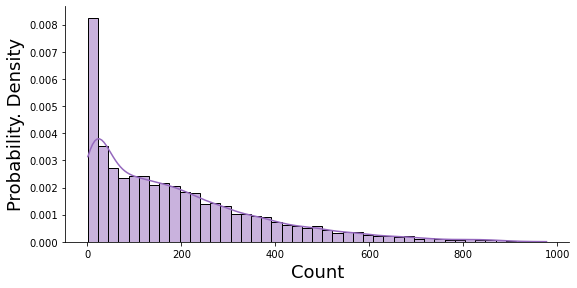

In [22]:
sns.displot(df1["count"], kde=True, height=4, aspect=2, stat='density', color='tab:purple')
plt.xlabel('Count', fontsize=18)
plt.ylabel('Probability. Density', fontsize=18)
plt.savefig("E:/kaggle/Bike renting/distributiion_count")
plt.show()

探究离散型变量（'weather','holiday','season'等）和目标变量之间的关系，为了突出比较，用箱型图表示

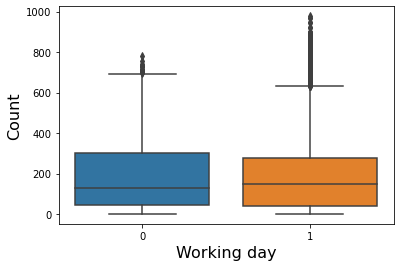

In [23]:
sns.boxplot(data=df1, y="count", x="workingday")
plt.xlabel('Working day', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.savefig("E:/kaggle/Bike renting/working")
plt.show()

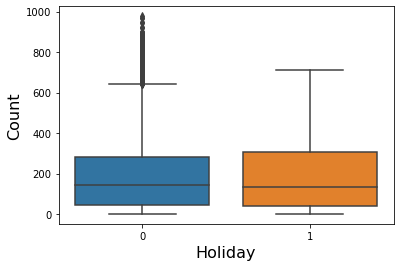

In [24]:
sns.boxplot(data=df1, y="count", x="holiday")
plt.xlabel('Holiday', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.savefig("E:/kaggle/Bike renting/holiday")
plt.show()

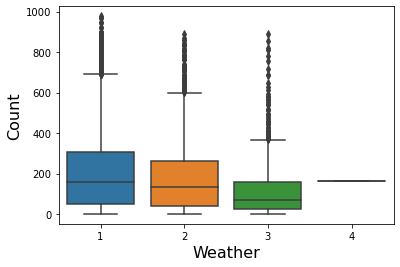

In [25]:
sns.boxplot(data=df1, y="count", x="weather")
plt.xlabel('Weather', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.savefig("E:/kaggle/Bike renting/weather")
plt.show()

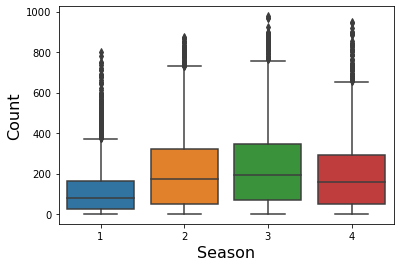

In [26]:
sns.boxplot(data=df1, y="count", x="season")
plt.xlabel('Season', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.savefig("E:/kaggle/Bike renting/season")
plt.show()

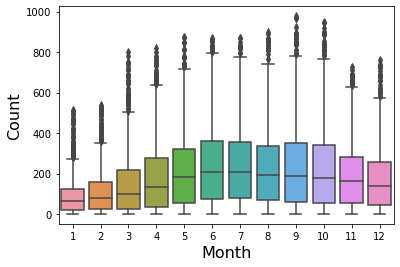

In [27]:
sns.boxplot(data=df1, y="count", x="month")
plt.xlabel('Month', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.savefig("E:/kaggle/Bike renting/month")
plt.show()

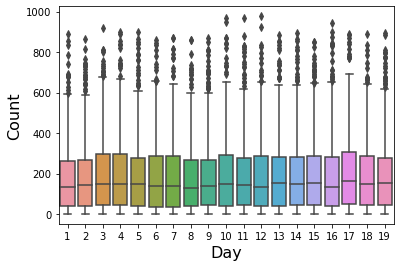

In [28]:
sns.boxplot(data=df1, y="count", x="day")
plt.xlabel('Day', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.savefig("E:/kaggle/Bike renting/day")
plt.show()

探索连续型数据（'temp','windspeed'等）与目标变量之间的关系，采用散点图

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


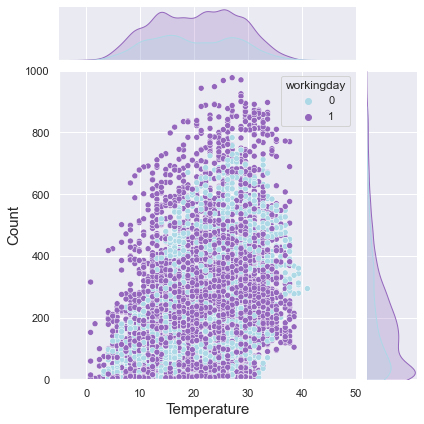

In [29]:
sns.set(style="darkgrid")
g1 = sns.jointplot('temp', 'count', data=df1, hue='workingday', palette=["lightblue","tab:purple"],
                 xlim=(-5, 50), ylim=(0, 1000), color="m")
g1.ax_joint.set_xlabel('Temperature', fontsize=15)    
g1.ax_joint.set_ylabel('Count', fontsize=15) 
plt.savefig("E:/kaggle/Bike renting/jointplot_temp")
plt.show()

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


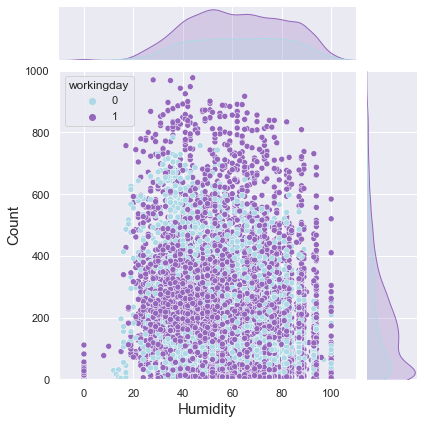

In [30]:
sns.set(style="darkgrid")
g2 = sns.jointplot('humidity', 'count', data=df1, hue='workingday', palette=["lightblue","tab:purple"],
                 xlim=(-10, 110), ylim=(0, 1000), color="m")
g2.ax_joint.set_xlabel('Humidity', fontsize=15)    
g2.ax_joint.set_ylabel('Count', fontsize=15)   
plt.savefig("E:/kaggle/Bike renting/jointplot_humidity")
plt.show()

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


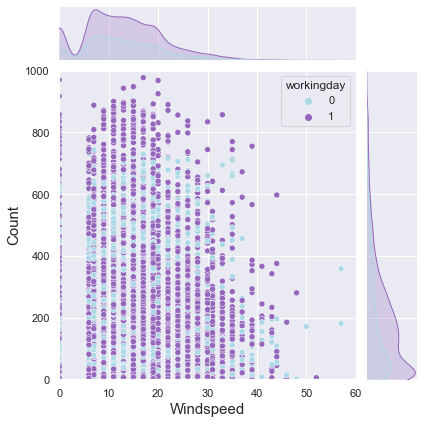

In [31]:
sns.set(style="darkgrid")
g2 = sns.jointplot('windspeed', 'count', data=df1, hue='workingday', palette=["lightblue","tab:purple"],
                 xlim=(0, 60), ylim=(0, 1000), color="m")
g2.ax_joint.set_xlabel('Windspeed', fontsize=15)    
g2.ax_joint.set_ylabel('Count', fontsize=15)  
plt.savefig("E:/kaggle/Bike renting/jointplot_windspeed")
plt.show()

探究变量之间的两两关系，用热力图来表示

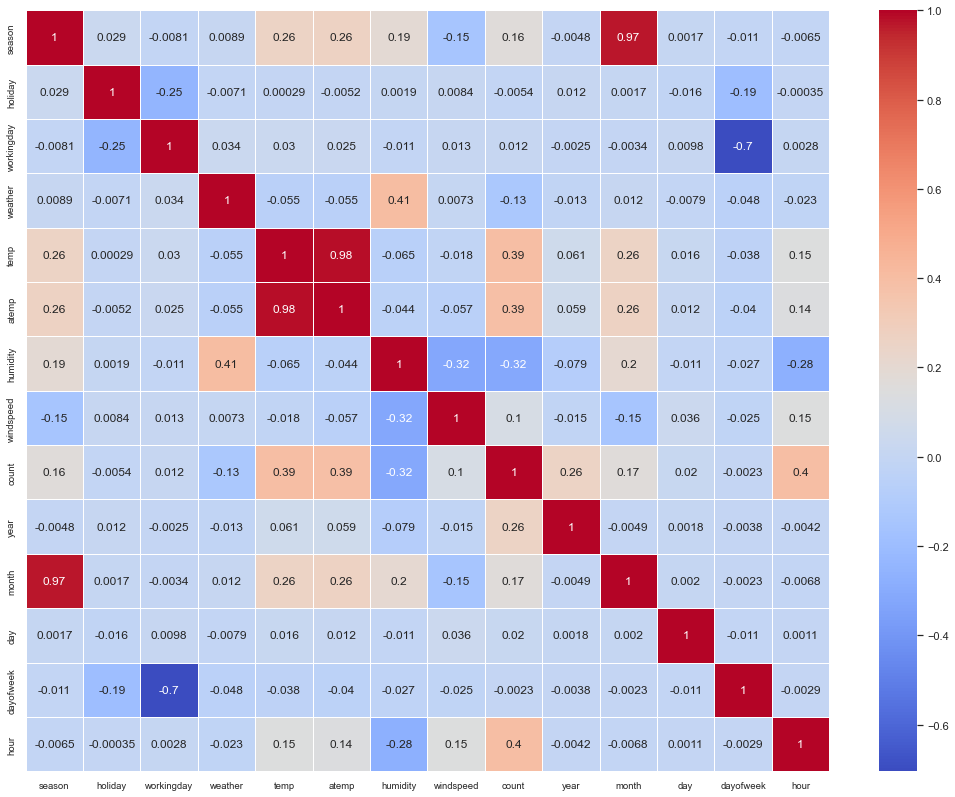

In [32]:
plt.figure(figsize=(18,14))
corr = df1.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=.5, cmap='coolwarm', annot=True)
plt.xticks(fontsize=9.5)
plt.yticks(fontsize=9.5)
plt.savefig("E:/kaggle/Bike renting/heatmap")
plt.show()


3、数据预处理

对训练集和测试集去除相关变量,atemp和temp相关性较大，去除，减少分析量,同时，去掉日期变量

In [79]:
df1=df1.drop(columns=['datetime','atemp'])
df1.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'count', 'year', 'month', 'day', 'dayofweek', 'hour'],
      dtype='object')

In [82]:
df2=df2.drop(columns=['datetime','atemp'])
df2.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'year', 'month', 'day', 'dayofweek', 'hour'],
      dtype='object')

由于训练集和测试集在日的数量上存在差异，因此，去掉'day'变量

In [103]:
df1=df1.drop(columns=['day'])
df1.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'count', 'year', 'month', 'dayofweek', 'hour'],
      dtype='object')

In [106]:
df2=df2.drop(columns=['day'])
df2.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'year', 'month', 'dayofweek', 'hour'],
      dtype='object')

首先，对count变量进行对数处理，尽量符合正态分布，并使用QQ plots验证是否能够向正态靠近

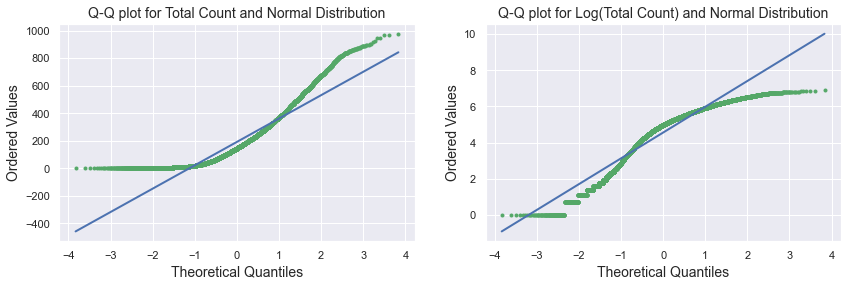

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
scipy.stats.probplot(df1["count"], dist="norm", fit=True, plot=ax[0])
scipy.stats.probplot(np.log(df1["count"]), dist="norm", fit=True, plot=ax[1])
ax[0].set_title('Q-Q plot for Total Count and Normal Distribution', fontsize=14)
ax[0].set_xlabel('Theoretical Quantiles', fontsize=14)
ax[0].set_ylabel('Ordered Values', fontsize=14)
ax[0].get_lines()[0].set_marker('.')
ax[0].get_lines()[0].set_markerfacecolor('g')
ax[0].get_lines()[0].set_markeredgecolor('g')
ax[0].get_lines()[1].set_linewidth(2.0)
ax[0].get_lines()[1].set_color('b')

ax[1].set_title('Q-Q plot for Log(Total Count) and Normal Distribution', fontsize=14)
ax[1].set_xlabel('Theoretical Quantiles', fontsize=14)
ax[1].set_ylabel('Ordered Values', fontsize=14)
ax[1].get_lines()[0].set_marker('.')
ax[1].get_lines()[0].set_markerfacecolor('g')
ax[1].get_lines()[0].set_markeredgecolor('g')
ax[1].get_lines()[1].set_linewidth(2.0)
ax[1].get_lines()[1].set_color('b')

plt.show()

对训练集里面的目标变量进行对数变换，并将目标变量count与其他变量分割开，能够适当向正态分布靠拢

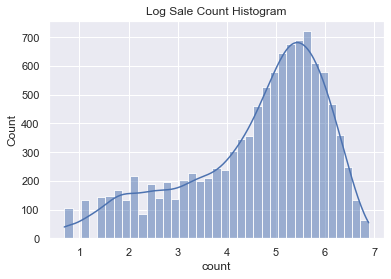

In [108]:
train_feature= df1.drop('count', axis=1)
train_target = df1['count']

plt.title('Log Sale Count Histogram')
train_target_log = np.log1p(train_target)
sns.histplot(train_target_log, kde=True)
plt.show()

In [109]:
train_feature.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'year', 'month', 'dayofweek', 'hour'],
      dtype='object')

对分类变量进行编码，设置哑变量

In [112]:
train_feature_ohe = pd.get_dummies(train_feature, columns=['season', 'weather', 'year', 'month', 'hour'])
train_feature_ohe.columns
train_feature_ohe

,holiday,workingday,temp,humidity,windspeed,dayofweek,season_1,season_2,season_3,season_4,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0,9.84,81,0.0000,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,9.02,80,0.0000,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,9.02,80,0.0000,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,9.84,75,0.0000,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,9.84,75,0.0000,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,50,26.0027,2,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
10882,0,1,14.76,57,15.0013,2,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
10883,0,1,13.94,61,15.0013,2,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10884,0,1,13.94,61,6.0032,2,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [113]:
test_ohe = pd.get_dummies(df2, columns=['season', 'weather', 'year', 'month', 'hour'])
test_ohe.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'dayofweek',
       'season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'year_2011', 'year_2012',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [114]:
train_feature_ohe.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'dayofweek',
       'season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'year_2011', 'year_2012',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [115]:
train_feature_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     10886 non-null  int64  
 1   workingday  10886 non-null  int64  
 2   temp        10886 non-null  float64
 3   humidity    10886 non-null  int64  
 4   windspeed   10886 non-null  float64
 5   dayofweek   10886 non-null  int64  
 6   season_1    10886 non-null  uint8  
 7   season_2    10886 non-null  uint8  
 8   season_3    10886 non-null  uint8  
 9   season_4    10886 non-null  uint8  
 10  weather_1   10886 non-null  uint8  
 11  weather_2   10886 non-null  uint8  
 12  weather_3   10886 non-null  uint8  
 13  weather_4   10886 non-null  uint8  
 14  year_2011   10886 non-null  uint8  
 15  year_2012   10886 non-null  uint8  
 16  month_1     10886 non-null  uint8  
 17  month_2     10886 non-null  uint8  
 18  month_3     10886 non-null  uint8  
 19  month_4     10886 non-nul

In [116]:
test_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     6493 non-null   int64  
 1   workingday  6493 non-null   int64  
 2   temp        6493 non-null   float64
 3   humidity    6493 non-null   int64  
 4   windspeed   6493 non-null   float64
 5   dayofweek   6493 non-null   int64  
 6   season_1    6493 non-null   uint8  
 7   season_2    6493 non-null   uint8  
 8   season_3    6493 non-null   uint8  
 9   season_4    6493 non-null   uint8  
 10  weather_1   6493 non-null   uint8  
 11  weather_2   6493 non-null   uint8  
 12  weather_3   6493 non-null   uint8  
 13  weather_4   6493 non-null   uint8  
 14  year_2011   6493 non-null   uint8  
 15  year_2012   6493 non-null   uint8  
 16  month_1     6493 non-null   uint8  
 17  month_2     6493 non-null   uint8  
 18  month_3     6493 non-null   uint8  
 19  month_4     6493 non-null  

将原训练集按照7：3的比例分成训练集和验证集

In [117]:
from sklearn.model_selection import train_test_split 

X_train, X_validation, y_train, y_validation = train_test_split(train_feature_ohe, train_target_log, test_size=0.3, random_state=2208)
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape
# ((7620, 53), (3266, 53), (7620,), (3266,))

((7620, 52), (3266, 52), (7620,), (3266,))

连续变量归一化，只在训练集、验证集上进行归一化

In [118]:
scl = StandardScaler()
scl.fit(X_train)

X_train_scaled = scl.transform(X_train)
X_valid_scaled = scl.transform(X_validation)

进行函数计算均方根对数误差的值

In [119]:
# Root Mean Squared Log Error
def rmsle(y, pred):  
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    print('RMSLE: {0:.3f}'.format(rmsle_val))

验证训练集与测试集变量数目是否相同

In [120]:
test_ohe.columns==train_feature_ohe.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

4、模型预测

构造多重线性模型

In [121]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_validation)

evaluate_regr(y_validation, pred)

RMSLE: 0.136


C:\Users\dell\AppData\Local\Temp\ipykernel_22316\1999828589.py:4: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


以上为多重线性回归的RMSLE值为0.136

应用线性模型

In [122]:
def get_model_predict(model, X_train, X_validation, y_train, y_validation, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_validation)

    print('#',model.__class__.__name__,)
    evaluate_regr(y_validation, pred) 

lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_validation, y_train, y_validation,is_expm1=True)

# LinearRegression
RMSLE: 0.136
# Ridge
RMSLE: 0.137
# Lasso
RMSLE: 0.148


C:\Users\dell\AppData\Local\Temp\ipykernel_22316\1999828589.py:4: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


计算得到
线性回归的RMSLE值为0.436
岭回归的RMSLE值为0.137
lasso回归地RMSLE值为0.148

<AxesSubplot:>

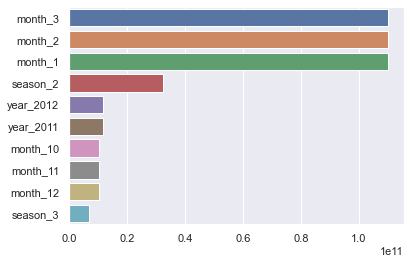

In [123]:
coef = pd.Series(lr_reg.coef_ , index=train_feature_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values , y=coef_sort.index)


September - really nice month to ride.

Hot summer (Aug, Jul) - too hot to walk.

winter? - too cold to walk.

应用RF, GBM, XGBoost, LightGBM models

In [124]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor 

rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model,X_train, X_validation, y_train, y_validation)


# RandomForestRegressor
RMSLE: 0.084
# GradientBoostingRegressor
RMSLE: 0.080
# XGBRegressor
RMSLE: 0.085
# LGBMRegressor
RMSLE: 0.078


RandomForestRegressor RMSLE: 0.084

GradientBoostingRegressor RMSLE: 0.080

XGBRegressor RMSLE: 0.085

LGBMRegressor RMSLE: 0.078 - the best score 

将最优模型应用到测试集中

In [125]:
test_ohe

,holiday,workingday,temp,humidity,windspeed,dayofweek,season_1,season_2,season_3,season_4,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,1,10.66,56,26.0027,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,10.66,56,0.0000,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,10.66,56,0.0000,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,10.66,56,11.0014,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,10.66,56,11.0014,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,0,1,10.66,60,11.0014,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6489,0,1,10.66,60,11.0014,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6490,0,1,10.66,60,11.0014,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6491,0,1,10.66,56,8.9981,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [126]:
test_ohe.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'dayofweek',
       'season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'year_2011', 'year_2012',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [127]:
# Predict test_ohe with LGBMRegressor (selected model)

pred = lgbm_reg.predict(test_ohe)
pred[0:10]

array([2.42233246, 1.53272438, 1.30873403, 1.32273984, 0.98087189,
       1.99283686, 3.72056736, 4.60189455, 5.35332948, 4.74563852])

In [128]:
# back to count's original values 
predicted_count = np.expm1(pred)
predicted_count[0:10]

array([ 10.27212045,   3.63077566,   2.70148479,   2.75369181,
         1.66678036,   6.33631636,  40.28781259,  98.6729723 ,
       210.31068191, 114.08126425])

In [129]:
# predict count

predicted_count = np.round(predicted_count, 0)
predicted_count[0:10]

array([ 10.,   4.,   3.,   3.,   2.,   6.,  40.,  99., 210., 114.])

储存数据并提交

In [135]:
bike_test = pd.read_csv("E:/kaggle/Bike renting/datasets/test.csv")

In [138]:
submission = pd.DataFrame({'datetime': bike_test['datetime'], 'count': predicted_count})
submission.to_csv("E:/kaggle/Bike renting/datasets/submission.csv")

In [139]:
df3=pd.read_csv("E:/kaggle/Bike renting/datasets/submission.csv")

In [140]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6493 non-null   int64  
 1   datetime    6493 non-null   object 
 2   count       6493 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 152.3+ KB


In [141]:
df3.head()

,Unnamed: 0,datetime,count
0,0,2011-01-20 00:00:00,10.0
1,1,2011-01-20 01:00:00,4.0
2,2,2011-01-20 02:00:00,3.0
3,3,2011-01-20 03:00:00,3.0
4,4,2011-01-20 04:00:00,2.0
